## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array 

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [5]:
X = data[:,0]
y = data[:,1]

#### Explore your data

In [6]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [7]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

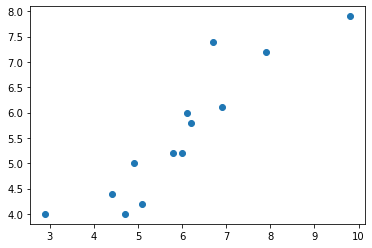

In [8]:
plt.scatter(X, y)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [9]:
alpha = 0.001
theta_0 = 0
theta_1 = 0

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [11]:
h = theta_0 + theta_1 * X 
print(f"h(x):{h}")

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [21]:
error = h - y
MSE = error @ error /(2*len(error))

print(f"Error Vector: {error} \n")
print(f"j = {MSE}")

Error Vector: [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981] 

j = 16.305384479692314


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [41]:
d_theta_0 = np.sum(error)/len(error)
d_theta_1 = error @ X / len(error)
print(f"d_theta_0 : {d_theta_0}")
print(f"d_theta_1 : {d_theta_1}")

d_theta_0 : -5.56923073976923
d_theta_1 : -35.04384604321538


### Step5: Update the parameters (simultaneously).

In [44]:
theta_0 = theta_0 - alpha*d_theta_0
theta_1 = theta_1 - alpha*d_theta_1
print(f"theta_0_new : {theta_0}")
print(f"theta_1_new : {theta_1}")


theta_0_new : 0.00556923073976923
theta_1_new : 0.03504384604321538


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [92]:
no_iterations = 1000
alpha = 0.001
theta_0 = 0
theta_1 = 0

In [93]:
for i in range(no_iterations):
    print(f"****************** Iteration {i} ********************")
    h = theta_0 + theta_1 * X 
    print(f"h(x):{h} \n")
    
    error = h - y
    MSE = error @ error /(2*len(error))
    print(f"Error Vector: {error} \n")
    print(f"j = {MSE} \n")
    
    d_theta_0 = np.sum(error)/len(error)
    d_theta_1 = error @ X / len(error)
    print(f"d_theta_0 : {d_theta_0}")
    print(f"d_theta_1 : {d_theta_1}")
    
    GV = np.array([[d_theta_0],[d_theta_1]])
    GVN = np.linalg.norm(GV,2)
    print(f"Gradient Vector:{GV} \n")
    print(f"Gradient Vector Norm: {GVN} \n")
    
    if GVN < 0.1:
        break
        
    theta_0 = theta_0 - alpha*d_theta_0
    theta_1 = theta_1 - alpha*d_theta_1
    print(f"theta_0_new : {theta_0} \n")
    print(f"theta_1_new : {theta_1} \n")
    


****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Error Vector: [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981] 

j = 16.305384479692314 

d_theta_0 : -5.56923073976923
d_theta_1 : -35.04384604321538
Gradient Vector:[[ -5.56923074]
 [-35.04384604]] 

Gradient Vector Norm: 35.48362265233601 

theta_0_new : 0.00556923073976923 

theta_1_new : 0.03504384604321538 

****************** Iteration 1 ********************
h(x):[0.10719639 0.24036299 0.17728408 0.28241562 0.34899893 0.24737177
 0.21933669 0.22284107 0.21583231 0.18429284 0.1702753  0.15976216
 0.20882354] 

Error Vector: [-3.89280361 -7.1596371  -4.82271592 -6.91758419 -7.55100117 -5.85262813
 -5.78066331 -5.57715912 -4.9841675  -4.01570697 -3.8297247  -4.24023794
 -4.99117626] 

j = 15.070907994095792 

d_theta_0 : -5.355015840795693
d_theta_1 : -33.67330670189463
Gradie


Error Vector: [-1.30944882 -1.37537006 -0.55467034 -0.12250243  0.84453692  0.10010823
 -0.50180342 -0.21406477  0.21045793  0.42080753  0.26985156 -0.39336506
  0.03498025] 

j = 0.20769272253604218 

d_theta_0 : -0.19926788489872516
d_theta_1 : -0.6899831618865334
Gradient Vector:[[-0.19926788]
 [-0.68998316]] 

Gradient Vector Norm: 0.7181813514976212 

theta_0_new : 0.14632156778420538 

theta_1_new : 0.878079222595362 

****************** Iteration 99 ********************
h(x):[2.6927514  6.02945219 4.44890984 7.08314751 8.75149812 6.20506829
 5.50260474 5.59041258 5.4147969  4.62452552 4.27329375 4.00987023
 5.23918123] 

Error Vector: [-1.3072486  -1.3705479  -0.55109016 -0.1168523   0.85149802  0.10506838
 -0.49739526 -0.20958761  0.21479709  0.42452571  0.27329375 -0.39012986
  0.03918142] 

j = 0.20718686081651788 

d_theta_0 : -0.19496056341422016
d_theta_1 : -0.6624648709535139
Gradient Vector:[[-0.19496056]
 [-0.66246487]] 

Gradient Vector Norm: 0.6905572579694215 

thet

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [94]:
y_pred_GD = theta_0 + theta_1 * X
print(f"h(x) = y_predict: {y_pred_GD} \n")
print(f"y_actual: {y} \n")

h(x) = y_predict: [2.7456161  6.14022094 4.53225036 7.21220176 8.9095044  6.31888463
 5.60423075 5.69356238 5.51489912 4.71091362 4.35358668 4.0855918
 5.33623587] 

y_actual: [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981] 



#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

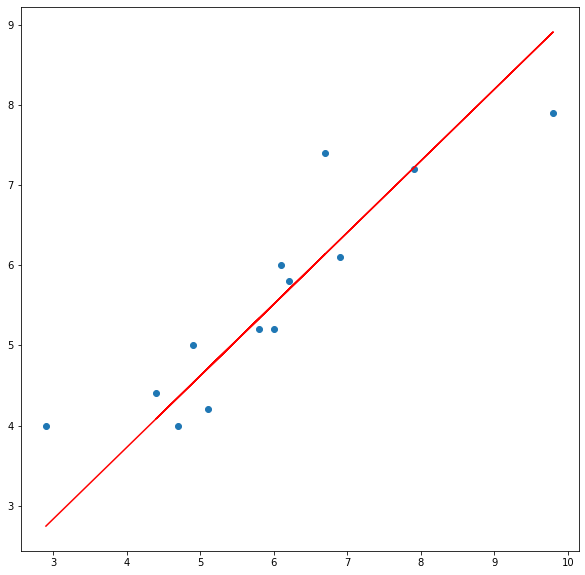

In [95]:
plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(X, y)
ax.plot(X,y_pred_GD,color='red')
plt.show()

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [77]:
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.7723168303032887

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [96]:
loss = []
theta_0 = 0 
theta_1 = 0
no_iterations = 500
for i in range(no_iterations):
    print(f"****************** Iteration {i} ********************")
    h = theta_0 + theta_1 * X 
    print(f"h(x):{h} \n")
    
    error = h - y
    MSE = error @ error /(2*len(error))
    print(f"Error Vector: {error} \n")
    print(f"j = {MSE} \n")
    
    loss.append(MSE)
    
    d_theta_0 = np.sum(error)/len(error)
    d_theta_1 = error @ X / len(error)
    print(f"d_theta_0 : {d_theta_0}")
    print(f"d_theta_1 : {d_theta_1}")
    
    GV = np.array([[d_theta_0],[d_theta_1]])
    GVN = np.linalg.norm(GV,2)
    print(f"Gradient Vector:{GV} \n")
    print(f"Gradient Vector Norm: {GVN} \n")
    
    if GVN < 0.1:
        break
        
    theta_0 = theta_0 - alpha*d_theta_0
    theta_1 = theta_1 - alpha*d_theta_1
    print(f"theta_0_new : {theta_0} \n")
    print(f"theta_1_new : {theta_1} \n")
    
  

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Error Vector: [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981] 

j = 16.305384479692314 

d_theta_0 : -5.56923073976923
d_theta_1 : -35.04384604321538
Gradient Vector:[[ -5.56923074]
 [-35.04384604]] 

Gradient Vector Norm: 35.48362265233601 

theta_0_new : 0.00556923073976923 

theta_1_new : 0.03504384604321538 

****************** Iteration 1 ********************
h(x):[0.10719639 0.24036299 0.17728408 0.28241562 0.34899893 0.24737177
 0.21933669 0.22284107 0.21583231 0.18429284 0.1702753  0.15976216
 0.20882354] 

Error Vector: [-3.89280361 -7.1596371  -4.82271592 -6.91758419 -7.55100117 -5.85262813
 -5.78066331 -5.57715912 -4.9841675  -4.01570697 -3.8297247  -4.24023794
 -4.99117626] 

j = 15.070907994095792 

d_theta_0 : -5.355015840795693
d_theta_1 : -33.67330670189463
Gradie


Error Vector: [-1.32461815 -1.40871772 -0.57940722 -0.16159063  0.79635955  0.06580381
 -0.53228082 -0.24502055  0.1804589   0.3951139   0.24607144 -0.41571004
  0.00593798] 

j = 0.21172620762005312 

d_theta_0 : -0.2290461200466452
d_theta_1 : -0.8802651514679684
Gradient Vector:[[-0.22904612]
 [-0.88026515]] 

Gradient Vector Norm: 0.9095761991154713 

theta_0_new : 0.14505497073868584 

theta_1_new : 0.8734857296776487 

****************** Iteration 93 ********************
h(x):[2.67816367 5.99740919 4.42513513 7.04559232 8.70521529 6.17210659
 5.47331784 5.56066633 5.38596935 4.59983211 4.25043773 3.98839226
 5.21127237] 

Error Vector: [-1.32183633 -1.4025909  -0.57486487 -0.15440749  0.80521519  0.07210668
 -0.52668216 -0.23933386  0.18596954  0.3998323   0.25043773 -0.41160783
  0.01127256] 

j = 0.21091489106093508 

d_theta_0 : -0.22357611063380112
d_theta_1 : -0.8453078192657012
Gradient Vector:[[-0.22357611]
 [-0.84530782]] 

Gradient Vector Norm: 0.8743749690824143 

thet

### Plot loss vs. iterations

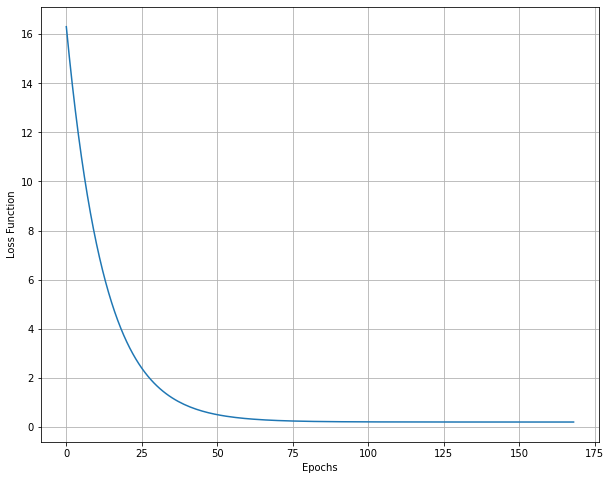

In [103]:
plt.figure(figsize=(10, 8))
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.grid()
plt.show()

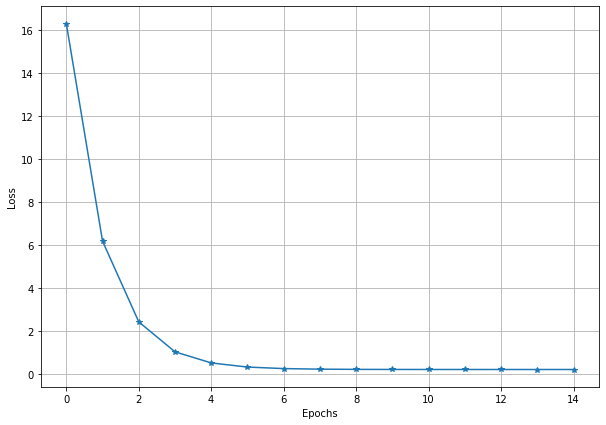

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [104]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [105]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [109]:
X2 = data2[:,:-1]
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [108]:
y2 = data2[:,-1]
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [129]:
added_column = np.ones(X2.shape[0])
X2 = np.insert(X2, 0, values=added_column, axis=1)
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [153]:
error.T.shape

(25,)

In [155]:
multiv = X2.shape[1]
loss = []
theta = np.zeros(multiv)
alpha = 0.0001
no_iterations = 1000
for i in range(no_iterations):
    print(f"****************** Iteration {i} ********************")
    h = X2 @ theta
    print(f"h(x):{h} \n")
    
    error = h - y2
    MSE = error @ error /(2*len(error))
    print(f"Error Vector: {error} \n")
    print(f"j = {MSE} \n")
    
    loss.append(MSE)
    
    d_theta = error @ X2 / len(error)
    #d_theta_0 = np.sum(error)/len(error)
    #d_theta_1 = error @ X / len(error)
    print(f"d_theta : {d_theta}")
    
    GV = d_theta
    GVN = np.linalg.norm(GV,2)
    print(f"Gradient Vector:{GV} \n")
    print(f"Gradient Vector Norm: {GVN} \n")
    
    if GVN < 0.1:
        break
        
    theta = theta - alpha*d_theta
    print(f"theta_new : {theta} \n")

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] 

Error Vector: [-152. -185. -180. -196. -142. -101. -149. -115. -175. -164. -141. -141.
 -184. -152. -148. -192. -147. -183. -177. -159. -177. -175. -175. -149.
 -192.] 

j = 13405.98 

d_theta : [  -162.04 -13075.8  -13147.2  -13467.08]
Gradient Vector:[  -162.04 -13075.8  -13147.2  -13467.08] 

Gradient Vector Norm: 22917.545989219703 

theta_new : [0.016204 1.30758  1.31472  1.346708] 

****************** Iteration 1 ********************
h(x):[301.650244 362.560348 357.234064 389.057244 276.510624 203.864004
 291.22502  215.899264 338.842264 313.855728 280.579308 276.659996
 369.069972 306.802308 292.564588 367.915192 292.187588 349.498828
 351.854372 314.82572  341.507404 340.132136 325.599384 304.130312
 375.750104] 

Error Vector: [149.650244 177.560348 177.234064 193.057244 134.510624 102.864004
 142.22502  100.899264 163.842264 149.855728 139.5

d_theta : [  -7.1064606  -572.05665145 -575.09982748 -599.67236937]
Gradient Vector:[  -7.1064606  -572.05665145 -575.09982748 -599.67236937] 

Gradient Vector Norm: 1008.7844548777714 

theta_new : [0.00844635 0.66587505 0.66706131 0.77633243] 

****************** Iteration 77 ********************
h(x):[160.20716211 192.83513739 189.8438238  206.93770264 146.98664165
 108.68292799 155.09395894 115.23995293 180.50733802 167.62412098
 149.32038397 147.42728492 195.95190167 162.64974755 155.86910511
 195.83119599 154.7669038  186.17875939 186.73968033 167.09038616
 181.84739191 181.06631446 173.30104562 161.10064145 199.72073394] 

Error Vector: [ 8.20716211  7.83513739  9.8438238  10.93770264  4.98664165  7.68292799
  6.09395894  0.23995293  5.50733802  3.62412098  8.32038397  6.42728492
 11.95190167 10.64974755  7.86910511  3.83119599  7.7669038   3.17875939
  9.73968033  8.09038616  4.84739191  6.06631446 -1.69895438 12.10064145
  7.72073394] 

j = 29.06405706469515 

d_theta : [  6.8


Error Vector: [ 1.8728576   0.43084432  2.42851019  3.00926969 -0.73011367  3.71995093
  0.31977791 -3.8224016  -1.18397366 -2.22919451  2.66812964  1.00273573
  4.14343112  3.96159927  2.11589997 -3.56117746  1.28307096 -3.70601334
  2.2397889   1.38390058 -1.94616057 -0.74933773 -8.23583481  5.37076618
 -0.05529065] 

j = 4.711727117387845 

d_theta : [ 0.3892414  31.99519005 31.93917858 23.21645082]
Gradient Vector:[ 0.3892414  31.99519005 31.93917858 23.21645082] 

Gradient Vector Norm: 50.822813899037655 

theta_new : [0.00785672 0.61076845 0.61218507 0.79521143] 

****************** Iteration 150 ********************
h(x):[153.20961698 184.63627237 181.64411949 198.15690848 140.66296878
 104.27572679 148.68385559 110.70902398 173.07636169 161.09012555
 143.05426956 141.39932408 187.33114503 155.28380483 149.47765039
 187.63409173 147.63605385 178.53142109 178.46469039 159.69043732
 174.30781495 173.50693703 166.05212877 153.69763183 191.11992596] 

Error Vector: [ 1.20961698 -0.

d_theta : [ 0.05876857  4.51202508  4.04938797 -3.90568728]
Gradient Vector:[ 0.05876857  4.51202508  4.04938797 -3.90568728] 

Gradient Vector Norm: 7.212056584287447 

theta_new : [0.00760448 0.58925938 0.59320226 0.83863962] 

****************** Iteration 222 ********************
h(x):[153.37769238 185.00401141 181.91066178 198.57428956 140.87966258
 104.65083527 149.13872051 111.24049972 173.61371586 161.88354118
 143.41135297 141.87324066 187.479148   155.23596944 149.97341726
 188.11313254 147.48750062 179.11930332 178.56004617 159.78087534
 174.81983478 173.96542364 166.48999233 153.57051882 191.41508012] 

Error Vector: [ 1.37769238e+00  4.01140781e-03  1.91066178e+00  2.57428956e+00
 -1.12033742e+00  3.65083527e+00  1.38720515e-01 -3.75950028e+00
 -1.38628414e+00 -2.11645882e+00  2.41135297e+00  8.73240662e-01
  3.47914800e+00  3.23596944e+00  1.97341726e+00 -3.88686746e+00
  4.87500617e-01 -3.88069668e+00  1.56004617e+00  7.80875338e-01
 -2.18016522e+00 -1.03457636e+00 -8.510


j = 3.9560689030257112 

d_theta : [ 0.04574299  2.66363024  1.97791725 -4.68109388]
Gradient Vector:[ 0.04574299  2.66363024  1.97791725 -4.68109388] 

Gradient Vector Norm: 5.737753482715108 

theta_new : [0.00725313 0.56611931 0.57480403 0.87933675] 

****************** Iteration 303 ********************
h(x):[153.26854147 185.01742142 181.83934602 198.61917691 140.82460129
 104.81608323 149.31391355 111.56409143 173.80945904 162.34859479
 143.49735043 142.06878634 187.28237613 154.90658383 150.18456558
 188.2302357  147.06976061 179.37359777 178.33068374 159.58222361
 175.0024907  174.08841507 166.61691762 153.17396449 191.348473  ] 

Error Vector: [ 1.26854147  0.01742142  1.83934602  2.61917691 -1.17539871  3.81608323
  0.31391355 -3.43590857 -1.19054096 -1.65140521  2.49735043  1.06878634
  3.28237613  2.90658383  2.18456558 -3.7697643   0.06976061 -3.62640223
  1.33068374  0.58222361 -1.9975093  -0.91158493 -8.38308238  4.17396449
 -0.651527  ] 

j = 3.9527807753722275 

d_the

Gradient Vector:[ 0.05148453  2.44266716  1.60770177 -3.95154778] 

Gradient Vector Norm: 4.916168050793868 

theta_new : [0.00686066 0.54550391 0.56031434 0.9135287 ] 

****************** Iteration 383 ********************
h(x):[153.16844561 185.00455508 181.76289637 198.63891111 140.75640135
 104.93710591 149.45160136 111.83486938 173.94811649 162.71419879
 143.55622919 142.2136901  187.09969805 154.61441163 150.35031963
 188.30545553 146.69969252 179.5791369  178.12359199 159.40396556
 175.14279734 174.1700269  166.71219518 152.83178553 191.2696959 ] 

Error Vector: [ 1.16844561e+00  4.55508489e-03  1.76289637e+00  2.63891111e+00
 -1.24359865e+00  3.93710591e+00  4.51601357e-01 -3.16513062e+00
 -1.05188351e+00 -1.28580121e+00  2.55622919e+00  1.21369010e+00
  3.09969805e+00  2.61441163e+00  2.35031963e+00 -3.69454447e+00
 -3.00307482e-01 -3.42086310e+00  1.12359199e+00  4.03965557e-01
 -1.85720266e+00 -8.29973100e-01 -8.28780482e+00  3.83178553e+00
 -7.30304098e-01] 

j = 3.72700272


j = 3.59392268751013 

d_theta : [ 0.05500397  2.25035936  1.33285762 -3.48972912]
Gradient Vector:[ 0.05500397  2.25035936  1.33285762 -3.48972912] 

Gradient Vector Norm: 4.36140590548049 

theta_new : [0.00652475 0.53073344 0.55108281 0.93690838] 

****************** Iteration 446 ********************
h(x):[153.10481914 184.9925013  181.71209081 198.65388837 140.70511793
 105.01516725 149.54920531 112.0261366  174.03763025 162.9582007
 143.59724055 142.30946834 186.97626417 154.41540301 150.46576433
 188.35430925 146.44471362 179.72586563 177.98480664 159.28555153
 175.2415427  174.22323684 166.7808186  152.60263435 191.21393241] 

Error Vector: [ 1.10481914e+00 -7.49870449e-03  1.71209081e+00  2.65388837e+00
 -1.29488207e+00  4.01516725e+00  5.49205313e-01 -2.97386340e+00
 -9.62369752e-01 -1.04179930e+00  2.59724055e+00  1.30946834e+00
  2.97626417e+00  2.41540301e+00  2.46576433e+00 -3.64569075e+00
 -5.55286378e-01 -3.27413437e+00  9.84806637e-01  2.85551529e-01
 -1.75845730e+00 


Gradient Vector Norm: 3.832925864633205 

theta_new : [0.0061332  0.51589899 0.54281018 0.95941419] 

****************** Iteration 515 ********************
h(x):[153.04763912 184.97755598 181.66414797 198.66925416 140.65122556
 105.08582907 149.64601042 112.21560792 174.11862777 163.18731576
 143.6371129  142.39837517 186.85839888 154.2242047  150.57851342
 188.39860874 146.19718381 179.87238841 177.85340238 159.17439303
 175.33880408 174.27174513 166.84970658 152.38610988 191.15813227] 

Error Vector: [ 1.04763912 -0.02244402  1.66414797  2.66925416 -1.34877444  4.08582907
  0.64601042 -2.78439208 -0.88137223 -0.81268424  2.6371129   1.39837517
  2.85839888  2.2242047   2.57851342 -3.60139126 -0.80281619 -3.12761159
  0.85340238  0.17439303 -1.66119592 -0.72825487 -8.15029342  3.38610988
 -0.84186773] 

j = 3.4767191471693413 

d_theta : [ 0.05841172  2.05280414  1.07307533 -3.04433373]
Gradient Vector:[ 0.05841172  2.05280414  1.07307533 -3.04433373] 

Gradient Vector Norm: 3.825816


Error Vector: [ 0.99906747 -0.03966385  1.62091486  2.68435072 -1.40309252  4.14635459
  0.7381128  -2.6043225  -0.81203355 -0.60744233  2.67423664  1.47692683
  2.75071286  2.04834095  2.68405401 -3.56338224 -1.03310192 -2.98721046
  0.7345048   0.07480668 -1.56933265 -0.68634925 -8.08394304  3.19067362
 -0.89549448] 

j = 3.382967741791922 

d_theta : [ 0.06150752  1.86587804  0.84809698 -2.64288079]
Gradient Vector:[ 0.06150752  1.86587804  0.84809698 -2.64288079] 

Gradient Vector Norm: 3.3450517824463555 

theta_new : [0.00568923 0.50141109 0.53572795 0.98042057] 

****************** Iteration 589 ********************
h(x):[152.99847724 184.96009287 181.62037063 198.68454959 140.59618314
 105.14709388 149.73930636 112.39800967 174.18881312 163.39513176
 143.67471229 142.47790422 186.74934734 154.04610262 150.68541007
 188.43708253 145.96394894 180.0146157  177.7330052  159.07355766
 175.43185329 174.31416529 166.91692224 152.18821205 191.10380701] 

Error Vector: [ 0.99847724 -0.

****************** Iteration 665 ********************
h(x):[152.95883246 184.94120176 181.58240293 198.69906209 140.5427147
 105.19703171 149.82504159 112.56543908 174.24598478 163.57401711
 143.7084948  142.54526154 186.65336264 153.88817295 150.78200134
 188.46851535 145.7545699  180.14626351 177.62817784 158.98675193
 175.51672473 174.34912152 166.97945949 152.01638213 191.0533786 ] 

Error Vector: [ 0.95883246 -0.05879824  1.58240293  2.69906209 -1.4572853   4.19703171
  0.82504159 -2.43456092 -0.75401522 -0.42598289  2.7084948   1.54526154
  2.65336264  1.88817295  2.78200134 -3.53148465 -1.2454301  -2.85373649
  0.62817784 -0.01324807 -1.48327527 -0.65087848 -8.02054051  3.01638213
 -0.9466214 ] 

j = 3.3077134850386756 

d_theta : [ 0.06433466  1.68763227  0.65327472 -2.27930177]
Gradient Vector:[ 0.06433466  1.68763227  0.65327472 -2.27930177] 

Gradient Vector Norm: 2.9110523982426457 

theta_new : [0.00520433 0.4877508  0.52998292 0.99931638] 

****************** Iteration 66

Gradient Vector:[ 0.06665717  1.53480058  0.50219404 -1.98316158] 

Gradient Vector Norm: 2.558355857668985 

theta_new : [0.0047259  0.47600563 0.52579113 1.01483305] 

****************** Iteration 739 ********************
h(x):[152.92890604 184.92234255 181.55119428 198.7121021  140.49366494
 105.235234   149.89980284 112.7112768  174.28968945 163.71985815
 143.73730611 142.59918913 186.57321437 153.7552737  150.86485039
 188.49263283 145.57614716 180.26185729 177.54164758 158.91597367
 175.59019923 174.37622417 167.03463808 151.87496411 191.00898119] 

Error Vector: [ 0.92890604 -0.07765745  1.55119428  2.7121021  -1.50633506  4.235234
  0.89980284 -2.2887232  -0.71031055 -0.28014185  2.73730611  1.59918913
  2.57321437  1.7552737   2.86485039 -3.50736717 -1.42385284 -2.73814271
  0.54164758 -0.08402633 -1.40980077 -0.62377583 -7.96536192  2.87496411
 -0.99101881] 

j = 3.252516363126667 

d_theta : [ 0.06668681  1.53280871  0.50032501 -1.97939967]
Gradient Vector:[ 0.06668681  1.53

d_theta : [ 0.06825993  1.42539362  0.40343484 -1.78034437]
Gradient Vector:[ 0.06825993  1.42539362  0.40343484 -1.78034437] 

Gradient Vector Norm: 2.3170654200622143 

theta_new : [0.00434122 0.46757849 0.52322238 1.02553789] 

****************** Iteration 796 ********************
h(x):[152.91070259 184.90773335 181.53047286 198.72145781 140.45789987
 105.25881427 149.95213017 112.81325657 174.31664738 163.81594233
 143.7570891  142.6340936  186.5192142  153.66509772 150.92202417
 188.5075694  145.4537179  180.34323627 177.48396519 158.86933793
 175.64131158 174.39319813 167.07364106 151.78095361 190.97765647] 

Error Vector: [ 0.91070259 -0.09226665  1.53047286  2.72145781 -1.54210013  4.25881427
  0.95213017 -2.18674343 -0.68335262 -0.18405767  2.7570891   1.6340936
  2.5192142   1.66509772  2.92202417 -3.4924306  -1.5462821  -2.65676373
  0.48396519 -0.13066207 -1.35868842 -0.60680187 -7.92635894  2.78095361
 -1.02234353] 

j = 3.2187691010568646 

d_theta : [ 0.06828654  1.42354


Gradient Vector Norm: 2.0735158718704794 

theta_new : [0.00389205 0.45869848 0.52092329 1.03642011] 

****************** Iteration 861 ********************
h(x):[152.89425213 184.89116999 181.5098856  198.73143905 140.4192256
 105.28048864 150.00675871 112.91963115 174.34140921 163.91067158
 143.77738514 142.6678873  186.46479277 153.5736028  150.98095402
 188.5213536  145.32818735 180.42863479 177.42642997 158.82335461
 175.6943798  174.40906048 167.11471548 151.687437   190.94472208] 

Error Vector: [ 0.89425213 -0.10883001  1.5098856   2.73143905 -1.5807744   4.28048864
  1.00675871 -2.08036885 -0.65859079 -0.08932842  2.77738514  1.6678873
  2.46479277  1.5736028   2.98095402 -3.4786464  -1.67181265 -2.57136521
  0.42642997 -0.17664539 -1.3056202  -0.59093952 -7.88528452  2.687437
 -1.05527792] 

j = 3.1875664968296418 

d_theta : [ 0.06991315  1.30864531  0.30699317 -1.57265773]
Gradient Vector:[ 0.06991315  1.30864531  0.30699317 -1.57265773] 

Gradient Vector Norm: 2.070009068

d_theta : [ 0.0710793   1.22358925  0.24272064 -1.42720157]
Gradient Vector:[ 0.0710793   1.22358925  0.24272064 -1.42720157] 

Gradient Vector Norm: 1.8968501602657861 

theta_new : [0.00351837 0.45199059 0.51947068 1.04436323] 

****************** Iteration 914 ********************
h(x):[152.88372846 184.87784394 181.49520391 198.73906514 140.38932279
 105.29464884 150.04766847 112.99922823 174.35757457 163.97768723
 143.79233282 142.69133325 186.42541224 153.50694556 151.02455161
 188.53040432 145.23578541 180.49289817 177.38523107 158.79081993
 175.73391635 174.41963278 167.14572578 151.62065936 190.91989559] 

Error Vector: [ 0.88372846 -0.12215606  1.49520391  2.73906514 -1.61067721  4.29464884
  1.04766847 -2.00077177 -0.64242543 -0.02231277  2.79233282  1.69133325
  2.42541224  1.50694556  3.02455161 -3.46959568 -1.76421459 -2.50710183
  0.38523107 -0.20918007 -1.26608365 -0.58036722 -7.85427422  2.62065936
 -1.08010441] 

j = 3.1667504575416596 

d_theta : [ 0.07110063  1.2220


Error Vector: [ 0.8736753  -0.13841656  1.47922445  2.74795607 -1.64591975  4.30855477
  1.09445987 -1.90980209 -0.62656311  0.05000238  2.80915125  1.71609315
  2.38188841  1.43275974  3.07382811 -3.46064827 -1.8681303  -2.43325452
  0.34019451 -0.2442925  -1.22108831 -0.56971818 -7.81852795  2.54787558
 -1.10867971] 

j = 3.145474185973193 

d_theta : [ 0.07242489  1.12226858  0.17295069 -1.26056855]
Gradient Vector:[ 0.07242489  1.12226858  0.17295069 -1.26056855] 

Gradient Vector Norm: 1.6981393142213286 

theta_new : [0.00303747 0.44414203 0.51808929 1.05334662] 

****************** Iteration 981 ********************
h(x):[152.87354616 184.86134042 181.47900029 198.74808581 140.35356295
 105.30873706 150.09513552 113.09151089 174.37364472 164.05101157
 143.80939185 142.71643406 186.38127221 153.43170512 151.07453489
 188.53946959 145.1303835  180.56781459 177.33956104 158.75521745
 175.77955959 174.43042393 167.18199045 151.54685364 190.89090623] 

Error Vector: [ 0.87354616 -0.

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [156]:
new_h2 = X2 @ theta
print(f"h(x) = y_predict: {new_h2}")
print(f"y: {y2}")

h(x) = y_predict: [152.87121322 184.85674383 181.47483649 198.75052368 140.34382743
 105.31205204 150.10779197 113.11610301 174.37742357 164.06972743
 143.81388672 142.72273052 186.36979543 153.41203893 151.08774876
 188.54161627 145.10262039 180.58785665 177.3277855  158.74612896
 175.79168644 174.43302327 167.19171348 151.52786662 190.88314212]
y: [152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]


h(x) = y_predict:
[[152.93271151]
 [184.61231886]
 [181.38322157]
 [198.85544308]
 [139.90499943]
 [105.25867203]
 [150.57363082]
 [114.01431493]
 [174.32084699]
 [164.43562114]
 [143.95734843]
 [142.79946086]
 [186.06153677]
 [152.83944858]
 [151.53012506]
 [188.51733974]
 [144.20948104]
 [181.35413506]
 [177.0503019 ]
 [158.56752095]
 [176.22294238]
 [174.42154366]
 [167.57132207]
 [151.09544099]
 [190.5850901 ]]

y:
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]



### Plot loss vs. iterations

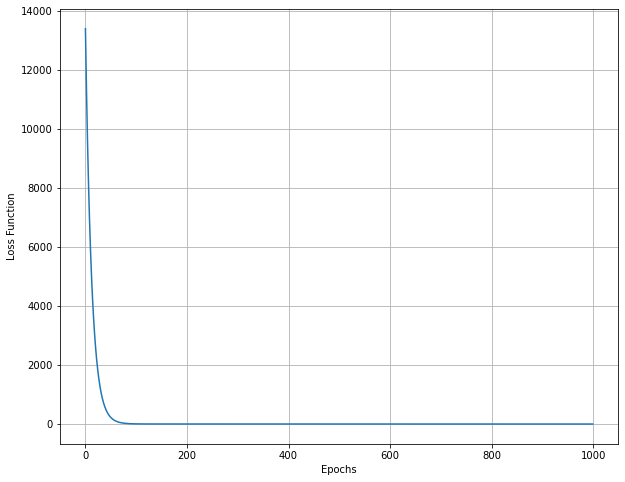

In [157]:
plt.figure(figsize=(10, 8))
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.grid()
plt.show()

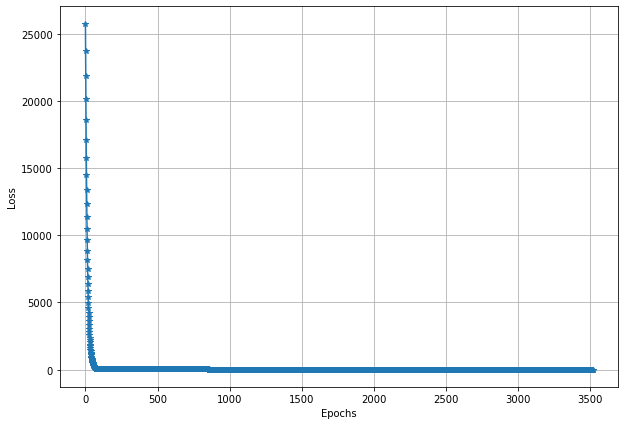

#### Use R2 score to evaluate LR equation output

In [149]:
r2_score(y2,new_h2)

0.9873898049486998